## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



**Import the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Load the data into pandas dataframe . Load the Boston Housing DataSet from data/boston_house_prices.csv**

In [2]:
df = pd.read_csv('./data/boston_house_prices.csv', skiprows=1)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

**Data preprocessing**

Check for missing values in all the columns

In [5]:
missings = df.isnull().sum()
missings

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
nans = df.isna().sum()
nans

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Data Visualization**

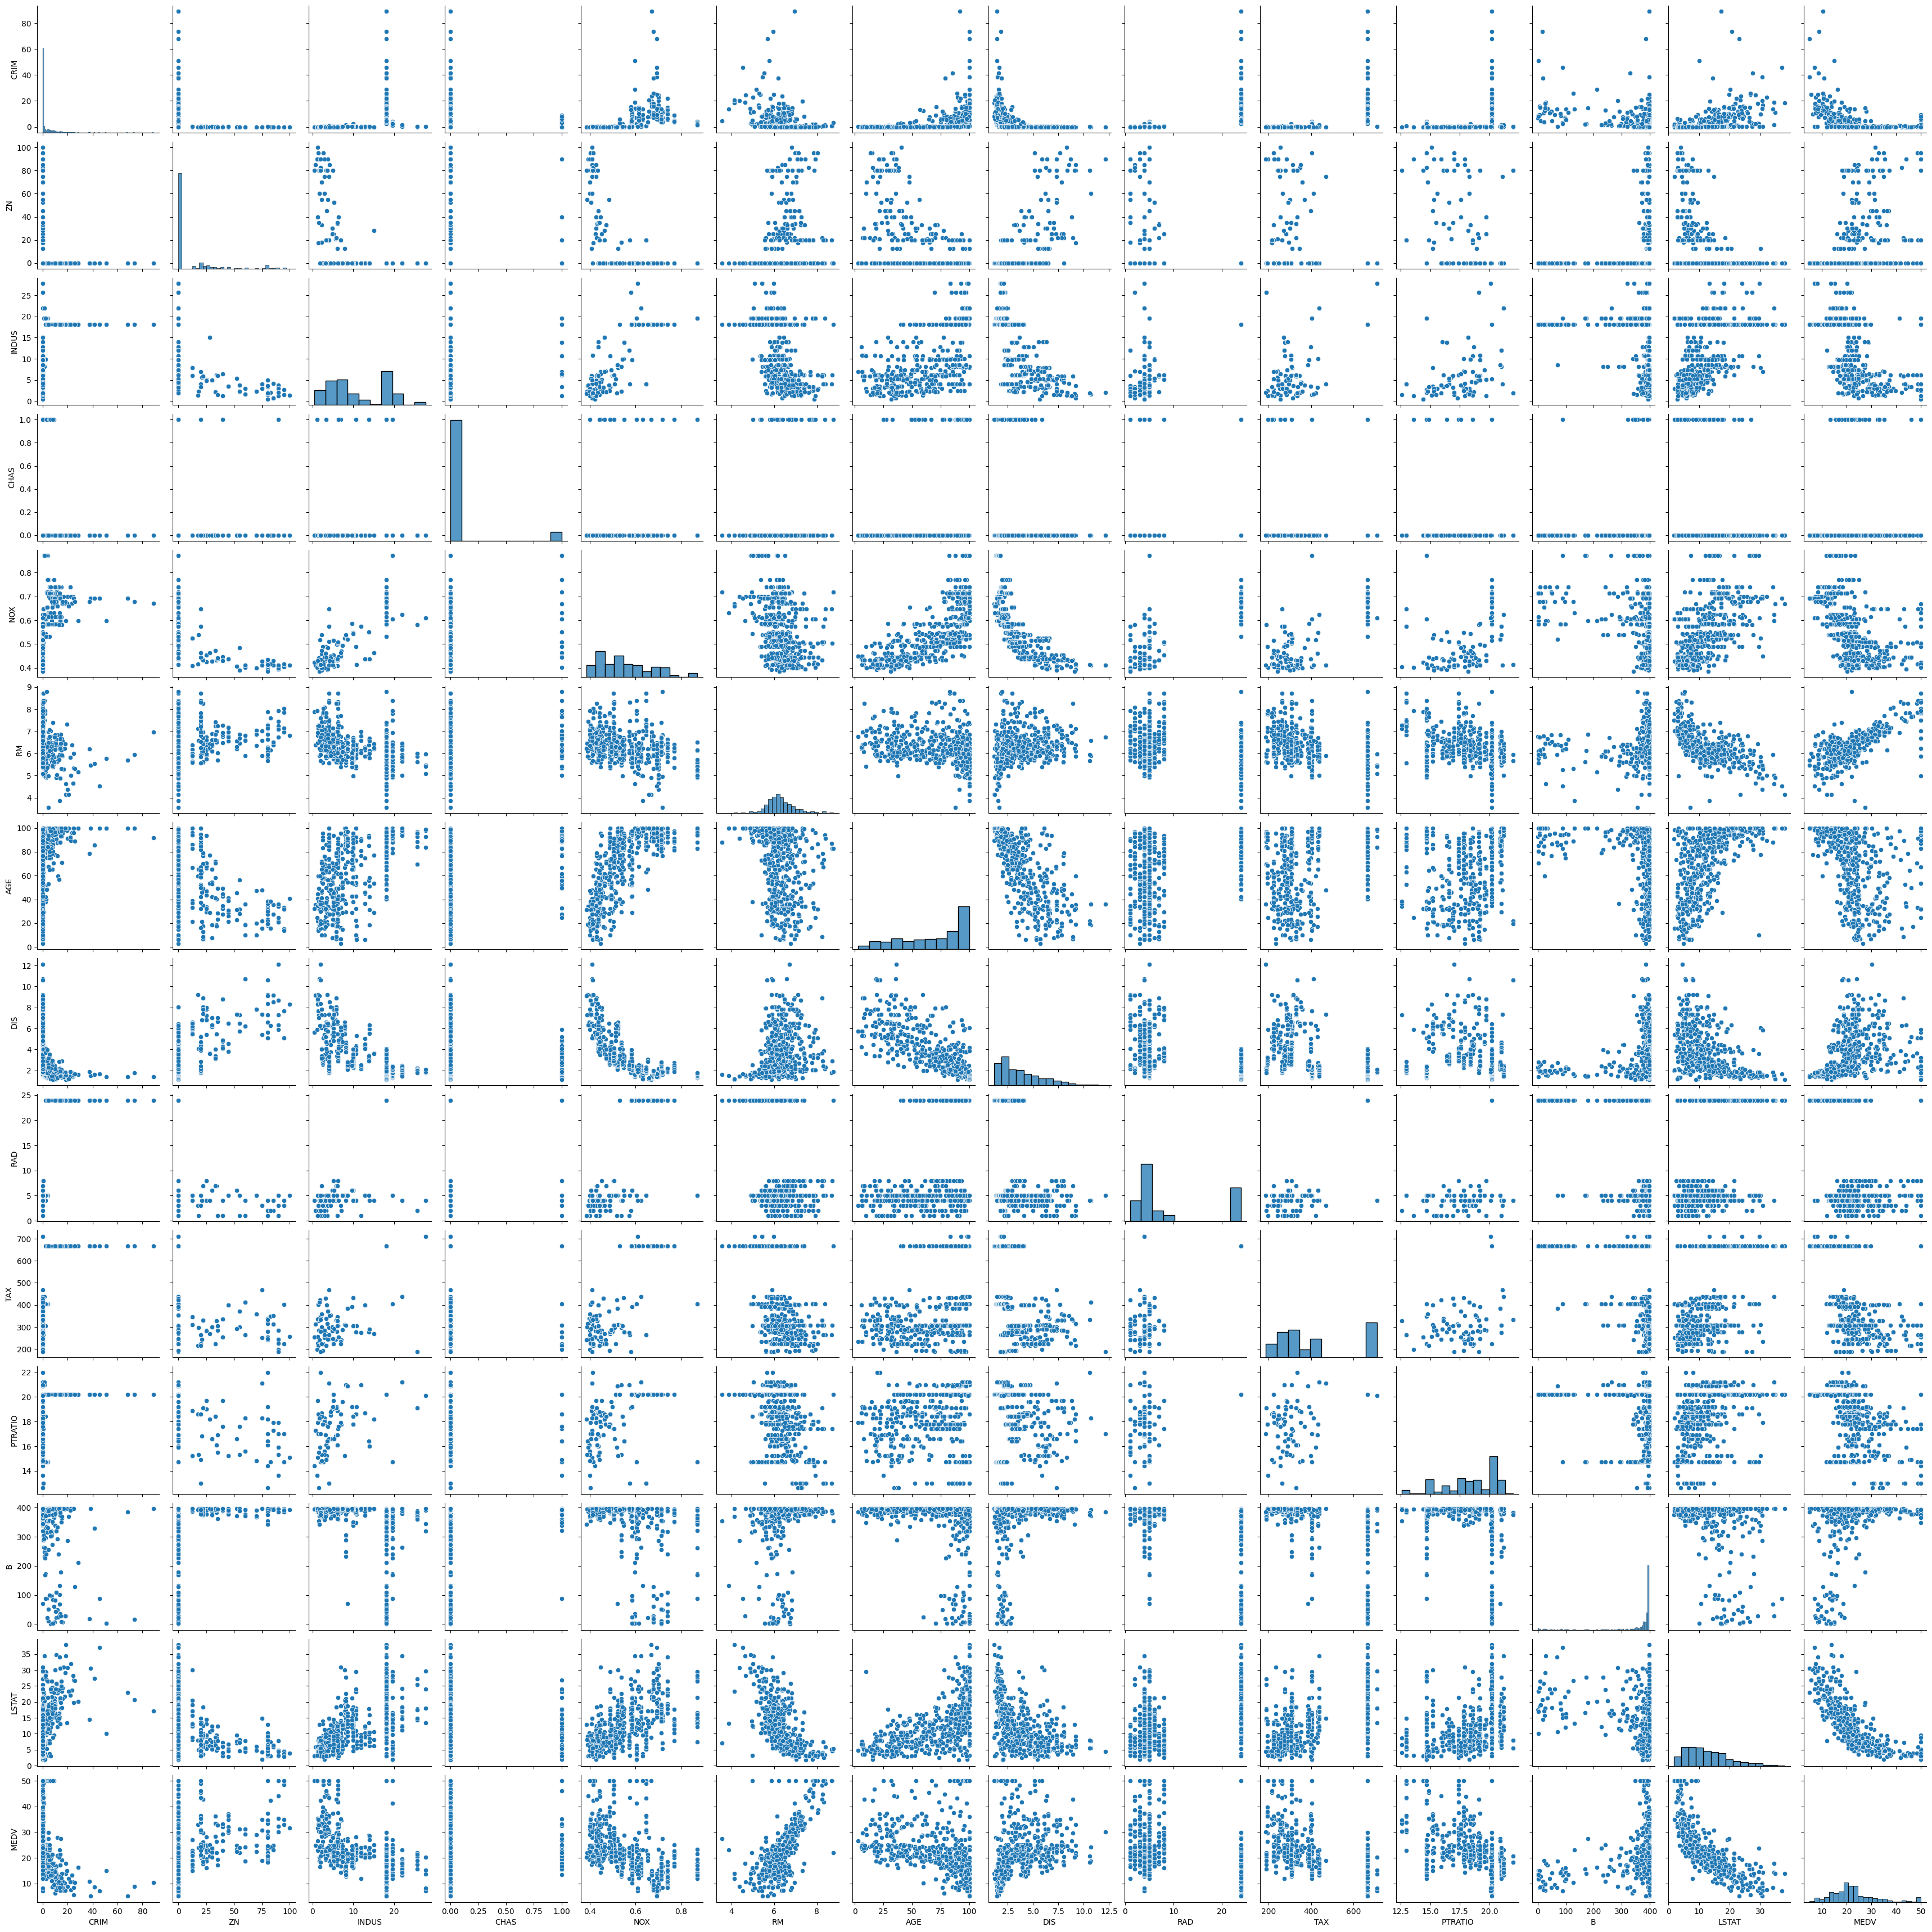

In [ ]:
# sns.pairplot(df);

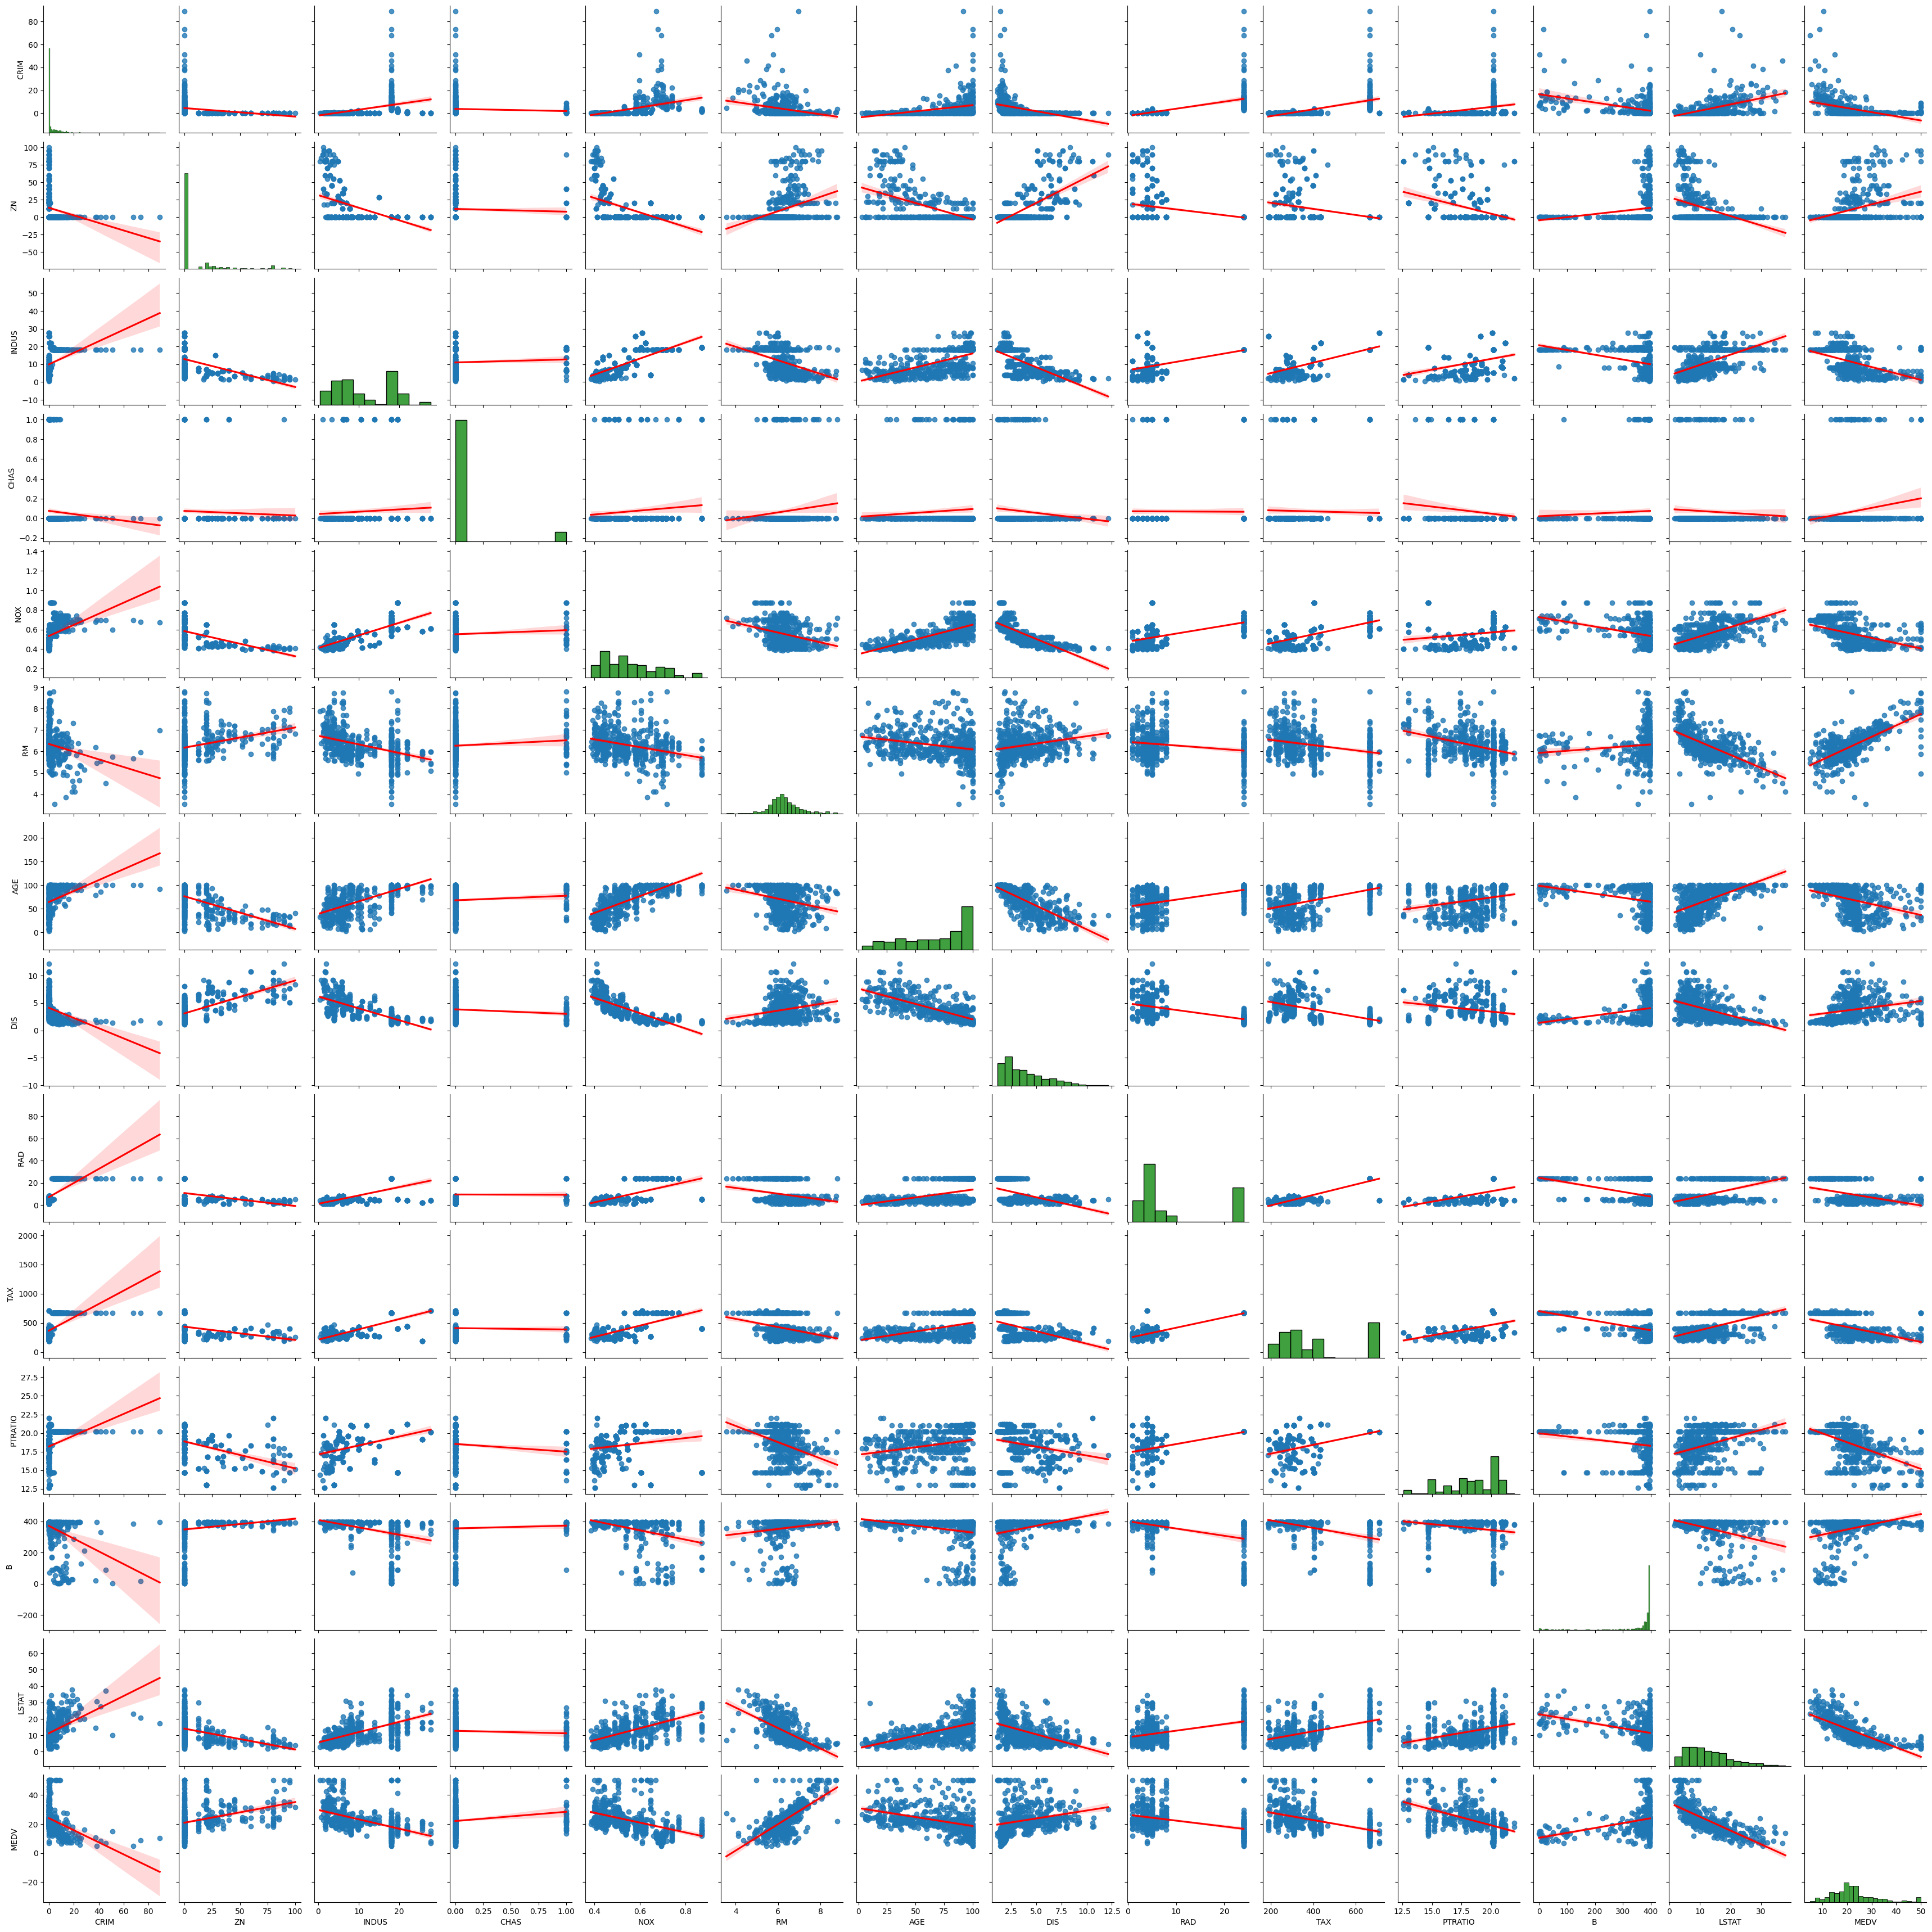

In [8]:
pair_plt = sns.pairplot(df, kind='reg', diag_kind='hist', plot_kws={"line_kws": {"color": "red"}}, diag_kws={"color": 'green'})

pair_plt.savefig('housing_pair_plot.jpg')

plt.show();

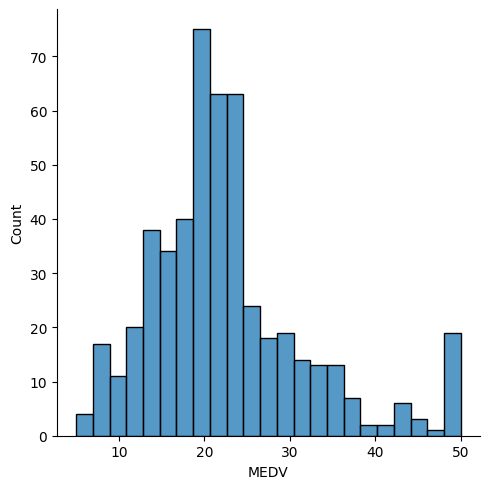

In [9]:
sns.displot(df['MEDV']);

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [10]:
plt.figure(figsize=(15, 15))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag");

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [11]:
df_orig = df.copy()
df = df.drop(columns='RAD', axis=1)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [12]:
df.shape

(506, 13)

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

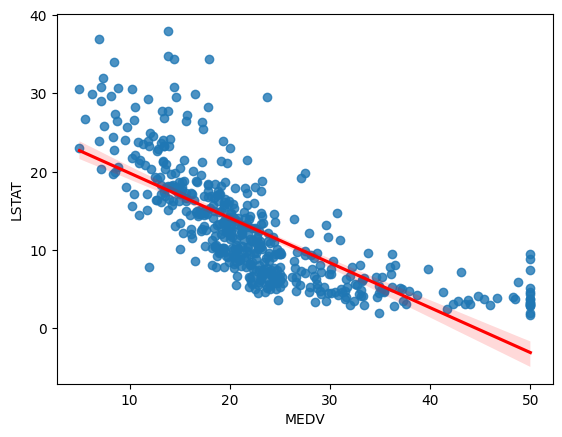

In [13]:
sns.regplot(data=df, x='MEDV', y='LSTAT', line_kws={"color": "red"});

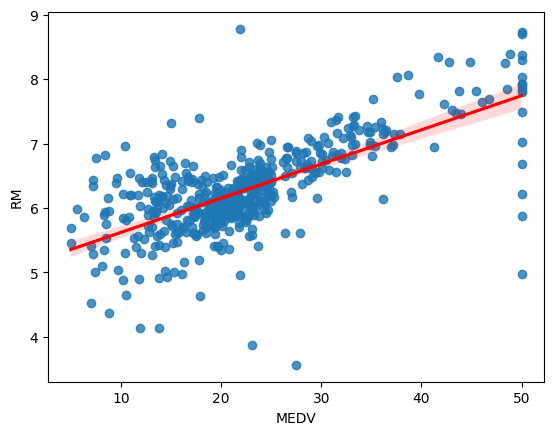

In [14]:
sns.regplot(data=df, x='MEDV', y='RM', line_kws={"color": "red"});

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
X = df.iloc[:,:-1]

In [17]:
y = df['MEDV']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [19]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (506, 12)
Train features shape: (404, 12)
Train target shape: (404,)
Test features shape: (102, 12)
Test target shape: (102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [20]:
#creating LinearRegression Object
lm = LinearRegression()

#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [21]:
print('Intercept:', lm.intercept_)
print('Coeff:', lm.coef_)

Intercept: 29.610498579915028
Coeff: [-8.96507890e-02  5.83404095e-02 -8.07258988e-02  2.40292124e+00
 -1.36032256e+01  3.42114388e+00  1.14179441e-02 -1.51022916e+00
  1.29624040e-03 -6.90015895e-01  1.03947956e-02 -5.79791312e-01]


In [22]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

Coefficient
CRIM       -0.089651
ZN          0.058340
INDUS      -0.080726
CHAS        2.402921
NOX       -13.603226
RM          3.421144
AGE         0.011418
DIS        -1.510229
TAX         0.001296
PTRATIO    -0.690016
B           0.010395
LSTAT      -0.579791

**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

In [23]:
predictions = lm.predict(X_test)
predictions

array([29.64514669, 32.15324311, 31.07138859, 24.33834316, 19.50368974,
       16.03685778, 36.61816341, 16.08259759, 24.94591872, 36.46057658,
       22.50001796, 30.73214918, 27.18820139, 33.41289891, 33.93023528,
       39.89502062, 24.27571354, 22.3778726 , 25.26039648, 22.82960695,
       33.21588529, 17.10034733, 26.55784893, 24.97740793, 33.49974755,
       19.68575845, 18.72691742, 16.40898653, 37.90514573,  0.26673015,
       32.77208278, 31.35039761, 26.61060507, 23.36464531, 19.34313406,
       20.31505349,  3.33251919, 34.45427757, 27.25625578, 28.17043897,
       33.66210841, 28.8910832 , 17.49659581, 31.78857231, 17.08443223,
       29.12112508, 18.63258585, 21.18872096, 36.72488697, 16.82046707,
       24.75414124, 18.49219921, 23.4704184 , 35.17082515, 27.69437749,
       33.88872678, 21.98878699, 18.98252214, 18.82701863, 24.67062563,
       21.53157977, 24.56865927, 41.01788585, 42.10496709, 30.28527522,
       18.30819943, 23.97479648,  2.77448445, 30.80983807, 28.74

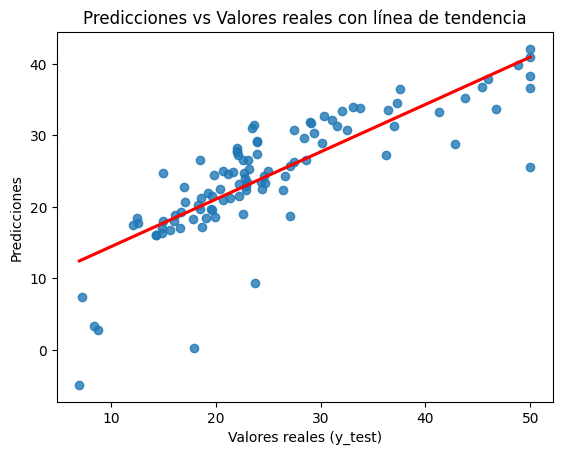

In [24]:
sns.regplot(x=y_test, y=predictions, ci=None, line_kws={"color": "red"})
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales con línea de tendencia")
plt.show()

In [25]:
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("r2_score train", lm.score(X_train, y_train))
print("r2_score test",lm.score(X_test, y_test))

MAE: 4.1494815665796425
MSE: 35.19426424736046
r2_score train 0.7370681380497377
r2_score test 0.6634728034689525


# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [26]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]], shape=(506, 91))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
predictions_pol = lin_reg.predict(X_test)

df_preds = pd.DataFrame(predictions_pol, columns = ['predictions_pol'])
df_preds['real_value'] = pd.Series(y_test)

df_preds


predictions_pol  real_value
0          26.551634        24.0
1          35.384230         NaN
2          17.998452        34.7
3          20.513686         NaN
4          15.915618         NaN
..               ...         ...
97          8.690789         NaN
98         11.533426         NaN
99         16.184894         NaN
100        23.402794         NaN
101        20.149351        26.5

[102 rows x 2 columns]

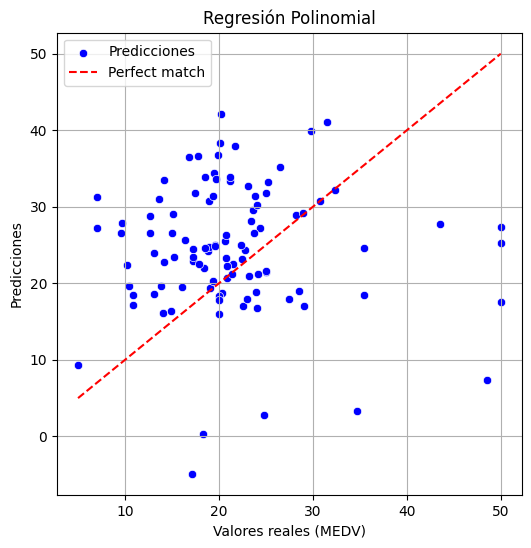

In [29]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect match')
plt.xlabel("Valores reales (MEDV)")
plt.ylabel("Predicciones")
plt.title("Regresión Polinomial")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
pol_reg.score(X_poly, y)

NameError: name 'pol_reg' is not defined

In [31]:
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R²:", r2_score(y_test, predictions))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 9.619184598459576
MSE: 154.64866016563062
R²: -1.1088324303075483
r2_score train 0.9325776797787773
r2_score test 0.7950446808038515


**Did the model improve using the Polynomial model?**

In [ ]:
#  r2_test: 0.63 -> 0.79

**Did the model improve using the Polynomial model with degree 3? Or more?**

#### Regresión polinómica grado 3

In [32]:
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R²:", r2_score(y_test, predictions))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 41.841947007905056
MSE: 6511.35151855904
R²: -87.79061242925196
r2_score train 0.9995849236403914
r2_score test -87.79061242925196


# Escalando Pol Degree 2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

poly_feats = PolynomialFeatures(degree=2)
X_poly_scaled = poly_feats.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Ajustar y predecir
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)


In [ ]:

print("ESCALADO CON MINMAX")
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions))
print("R²:", r2_score(y_test, predictions))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))


ESCALADO CON MINMAX
R²: -87.79061242925196
MAE: 41.841947007905056
RMSE: 6511.35151855904
r2_score train 0.9325776797787773
r2_score test 0.7950446808196803
